In [27]:
###################################
# ---   Übungsblatt 6      ---
# --- Programmieraufgabe 46---
# Namen der Gruppenmitglieder:
# 1. Lars Dickmann
# 2. ...
# 3. ...
#
# Ersetzen Sie die Lücken (...) mit dem passenden Matlab Code
# Alle Dateien muessen bis zum 23.11.2024 auf ISIS hochgeladen werden
###################################

Programmieraufgabe 1 ( 7 Punkte): Wir betrachten die Funktionen $f_1(x)=\frac{1}{1+25 x^2}$ und $f_2(x)=\sqrt{|x|}$, sowie Stützstellen gegeben durch


(a) $x_i=-1+i h, i=0, \ldots, n, h=2 / n$,
(äquidistante Stützstellen)


(b) $x_i=\cos \left(\frac{(2 i+1) \pi}{2(n+1)}\right), i=0, \ldots, n$.
(Tschebyscheff-Knoten)


Werten Sie die Interpolationspolynome $P_{m, n}$ zu den Stützstellen $\left(x_k, f_m\left(x_k\right)\right), m=1,2, k=$ $0, \ldots, n$ für $n=0,2,4,6, \ldots, 20$ an den Stellen $y_{i, j}=x_i+j \frac{x_{i+1}-x_i}{21}, j=1, \ldots, 20, i=0, \ldots, n-1$ aus. Schreiben Sie dazu zunächste Funktionen Newton_Interpolation zur Bestimmung der Koeffizienten des Interpolationspolynoms in Newton-Basis-Darstellung und Horner_Newton zur Auswertung des Polynoms mittels Newton-Horner-Schema. Vergleichen Sie als Schätzung für den maximalen Fehler $\max _{x \in[-1,1]}\left|P_{m, n}(x)-f_m(x)\right|$

$$
\max _{\substack{i \in\{0, \ldots, n-1\} \\ j \in\{1, \ldots, 20\}}}\left|P_{m, n}\left(y_{i, j}\right)-f_m\left(y_{i, j}\right)\right| .
$$


Plotten Sie die Funktionen $f_1$ und $f_2$ in seperaten Graphiken und ergänzen Sie die Plots der jeweiligen Interpolationspolynome zu den Stützstellen in (a) und (b) für $n=20$. Interpretieren Sie die Ergebnisse.

In [28]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
f_1 = lambda x: 1/(1+25*x**2)
f_2 = lambda x: abs(x)**0.5

In [30]:
n = 20

In [31]:
x_s = [np.cos((2*i+1)*np.pi/(2*n+2)) for i in range(n+1)]  # Tschebyscheff-Knoten

In [32]:
def newton_interpolation(x_vals, x, y):
    if len(x_vals) == 1:
        return y[x.index(x_vals[0])]
    return (newton_interpolation(x_vals[1:], x, y) - newton_interpolation(x_vals[:-1], x, y)) / (x_vals[-1] - x_vals[0])


#  erster versuch
# def newton_interpolation(x, x_i, y_i):
#     n = len(x)
#     if n == 1:
#         # print("Only " + str(n) + " point given")
#         # return y_i[0]
#         i = x_i.index(x[0])
#         # print("We are talking about index:" + str(i) + " which matches " + str(y_i[i]))
#         return y_i[i]
#     else:
#         a = newton_interpolation(x[1:], x_i, y_i) - newton_interpolation(x[:n-1], x_i, y_i)
#         b = x[-1] - x[0]
#         return a/b

In [33]:
def newton_base(var_x, x_vals):
    result = 1
    for x_i in x_vals:
        result *= (var_x - x_i)
    return result

[10, -8.0, 3.0]
[<function <lambda> at 0x0000020A6147E3E0>, <function <lambda> at 0x0000020A631F65C0>, <function <lambda> at 0x0000020A731F00E0>, <function <lambda> at 0x0000020A731F0180>]


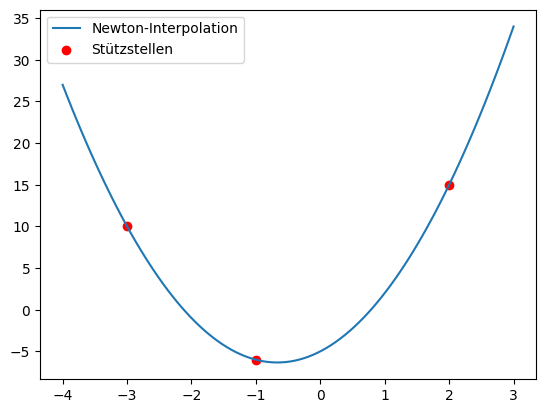

In [34]:
# Test der Newton-Interpolation
x = [-3, -1, 2]
y = [10, -6, 15]
a = []
N_0 = lambda var_x: 1
N = [N_0]
for i in range(1, len(x)+1):
    a.append(newton_interpolation(x[0:i], x, y))
    N.append(lambda var_x, i=i: newton_base(var_x, x[0:i]))
print(a)
print(N)

P = lambda var_x: sum(a[i] * N[i](var_x) for i in range(len(a))) # Das hier war deutlich schwerer Schreiben, als das was die Aufgabenstellung verlangt. 

var_x = np.linspace(-4, 3, 100)
var_y = [P(xi) for xi in var_x]

# Plot
plt.plot(var_x, var_y, label="Newton-Interpolation")
plt.scatter(x, y, color="red", label="Stützstellen")
plt.legend()
plt.show()

In [35]:
def polynom(var_x, a, N): # wird nicht verwendet
    result = 0
    for i in range(len(a)):
        result += a[i] * N[i]
    return result

$$P(x)=a_0+\left(x-x_0\right) \cdot\left(a_1+\left(x-x_1\right) \cdot\left(a_2+\cdots+\left(x-x_{n-1}\right) \cdot a_n\right)\right)$$


$$P(x)=a_i+\left(x-x_i\right) \cdot P(x) .$$

In [36]:
def horner_newton(var_x, a, x):
    if len(a) == 1:
        return a[0]   
    new_a = a[1:]
    new_x = x[1:]
    return a[0] + (var_x - x[0])*horner_newton(var_x, new_a, new_x)

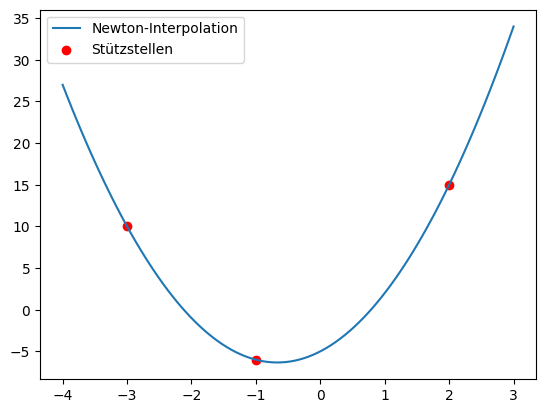

In [37]:
# Test Horner-Newton
x = [-3, -1, 2]
y = [10, -6, 15]
a = []
for i in range(1, len(x)+1):
    a.append(newton_interpolation(x[0:i], x, y))

var_x = np.linspace(-4, 3, 100)
var_y = [horner_newton(xi, a, x) for xi in var_x]

# Plot
plt.plot(var_x, var_y, label="Newton-Interpolation")
plt.scatter(x, y, color="red", label="Stützstellen")
plt.legend()
plt.show()

In [38]:
# Stützstellen
n = 20
x_s = [-1+i*2/n for i in range(n+1)]  #äquidistante Stützstellen
# x_s_2 = [x_s[i] for i in range(0, len(x_s))] 
y_1s = [f_1(x_s[i]) for i in range(0, len(x_s))]
y_2s = [f_2(x_s[i]) for i in range(0, len(x_s))]
# print(x_s)
# print(y_1s)
# print(y_2s)

In [39]:
y_ij = []
for i in range(0, len(x_s)-1):
    steps = np.linspace(x_s[i], x_s[i+1], 21)
    for i, step in enumerate(steps):
        if i == n:
            break
        y_ij.append(step)
# print(y_ij)

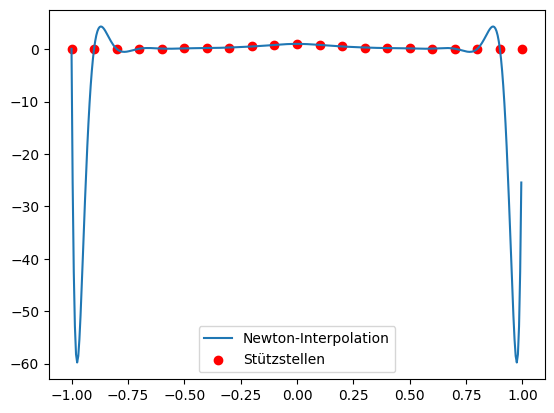

In [40]:
a_1 = []
for i in range(1, len(x_s)+1):
    a_1.append(newton_interpolation(x_s[0:i], x_s, y_1s))

var_y = [horner_newton(xi, a_1, x_s) for xi in y_ij]

# Plot
plt.plot(y_ij, var_y, label="Newton-Interpolation")
plt.scatter(x_s, y_1s, color="red", label="Stützstellen")
plt.legend()
plt.show()

## a) $f_1(x)$

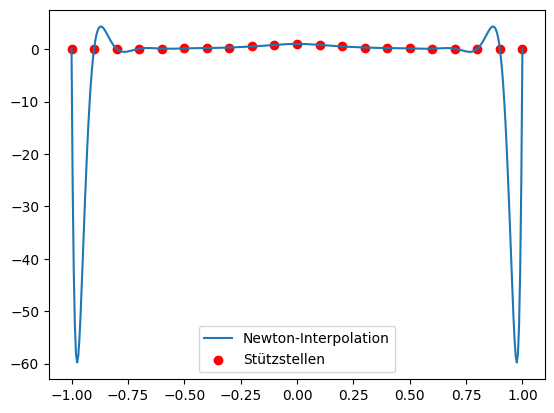

[np.float64(0.6461538461538461), np.float64(0.4381338742393508), np.float64(0.616945294585262), np.float64(1.0426421913719899), np.float64(1.9156430502193318), np.float64(3.6567104424820744), np.float64(7.163350799948488), np.float64(14.369904114770165), np.float64(29.18001879220184), np.float64(59.82230871072755)]


In [45]:
maxi = []
for n in range(2, 21, 2): # Ein n welches bei n = 0 beginnt ist nicht möglich.
    x_s = [-1+i*2/n for i in range(n+1)]
    y_1s = [f_1(x_s[i]) for i in range(0, len(x_s))]
    y_ij = []
    for i in range(0, len(x_s)-1):
        steps = np.linspace(x_s[i], x_s[i+1], 21)
        for i, step in enumerate(steps):
            if i == 21:
                break
            y_ij.append(step)
    a_1 = []
    for i in range(1, len(x_s)+1):
        a_1.append(newton_interpolation(x_s[0:i], x_s, y_1s))

    var_y = [horner_newton(xi, a_1, x_s) for xi in y_ij]
    y_real = [f_1(xi) for xi in y_ij]
    maxi.append(max([abs(y_r- v_y) for y_r, v_y in zip(y_real, var_y)]))
    if n == 20:
        # Plot
        plt.plot(y_ij, var_y, label="Newton-Interpolation")
        plt.scatter(x_s, y_1s, color="red", label="Stützstellen")
        plt.legend()
        plt.show()
maxi

## a) $f_2(x)$

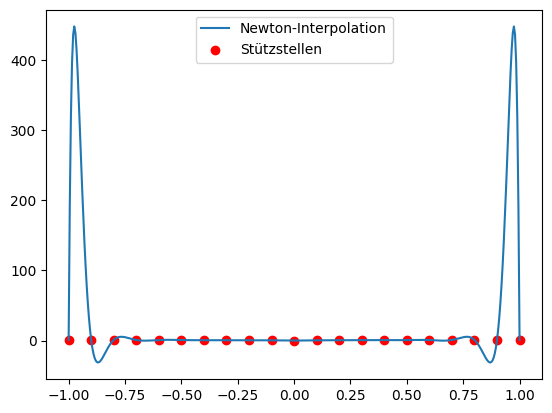

[np.float64(0.47245553203367585), np.float64(0.3153307252182953), np.float64(0.45637681929729756), np.float64(0.9138993896916318), np.float64(2.163644671203921), np.float64(5.641842893403496), np.float64(15.73760623533083), np.float64(46.41159670254408), np.float64(141.92623583909491), np.float64(446.5885536209709)]


[np.float64(0.47245553203367585),
 np.float64(0.3153307252182953),
 np.float64(0.45637681929729756),
 np.float64(0.9138993896916318),
 np.float64(2.163644671203921),
 np.float64(5.641842893403496),
 np.float64(15.73760623533083),
 np.float64(46.41159670254408),
 np.float64(141.92623583909491),
 np.float64(446.5885536209709)]

In [48]:
maxi = []
for n in range(2, 21, 2): # Ein n welches bei n = 0 beginnt ist nicht möglich.
    x_s = [-1+i*2/n for i in range(n+1)]
    y_1s = [f_2(x_s[i]) for i in range(0, len(x_s))]
    y_ij = []
    for i in range(0, len(x_s)-1):
        steps = np.linspace(x_s[i], x_s[i+1], 21)
        for i, step in enumerate(steps):
            if i == 21:
                break
            y_ij.append(step)
    a_1 = []
    for i in range(1, len(x_s)+1):
        a_1.append(newton_interpolation(x_s[0:i], x_s, y_1s))

    var_y = [horner_newton(xi, a_1, x_s) for xi in y_ij]
    y_real = [f_2(xi) for xi in y_ij]
    maxi.append(max([abs(y_r- v_y) for y_r, v_y in zip(y_real, var_y)]))
    if n == 20:
        # Plot
        plt.plot(y_ij, var_y, label="Newton-Interpolation")
        plt.scatter(x_s, y_1s, color="red", label="Stützstellen")
        plt.legend()
        plt.show()
maxi

## b) $f_1(x)$

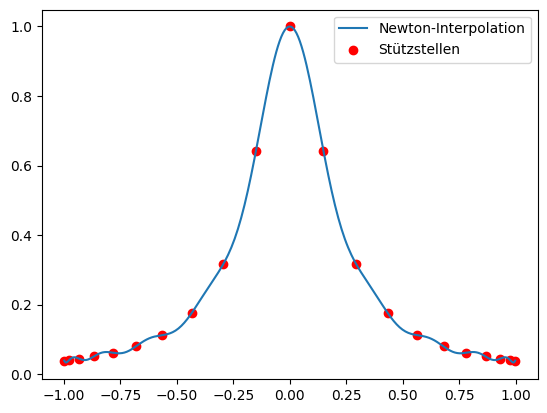

[np.float64(0.5992841091823694),
 np.float64(0.4018070558940131),
 np.float64(0.2642134793198863),
 np.float64(0.170248293933977),
 np.float64(0.1091531006831179),
 np.float64(0.06905053880025469),
 np.float64(0.0465283867197086),
 np.float64(0.032586065861006375),
 np.float64(0.02248546873701157),
 np.float64(0.015333231515194001)]

In [49]:
maxi = []
for n in range(2, 21, 2): # Ein n welches bei n = 0 beginnt ist nicht möglich.
    x_s = [np.cos( (2*i+1)*np.pi/(2*n+2)) for i in range(n+1)]
    y_1s = [f_1(x_s[i]) for i in range(0, len(x_s))]
    y_ij = []

    for i in range(0, len(x_s)-1):
        steps = np.linspace(x_s[i], x_s[i+1], 21)
        for i, step in enumerate(steps):
            if i == 21:
                break
            y_ij.append(step)

    a_1 = []
    for i in range(1, len(x_s)+1):
        a_1.append(newton_interpolation(x_s[0:i], x_s, y_1s))

    var_y = [horner_newton(xi, a_1, x_s) for xi in y_ij]
    y_real = [f_1(xi) for xi in y_ij]
    maxi.append(max([abs(y_r- v_y) for y_r, v_y in zip(y_real, var_y)]))
    if n == 20:
        # Plot
        plt.plot(y_ij, var_y, label="Newton-Interpolation")
        plt.scatter(x_s, y_1s, color="red", label="Stützstellen")
        plt.legend()
        plt.show()
maxi

## b) $f_2(x)$

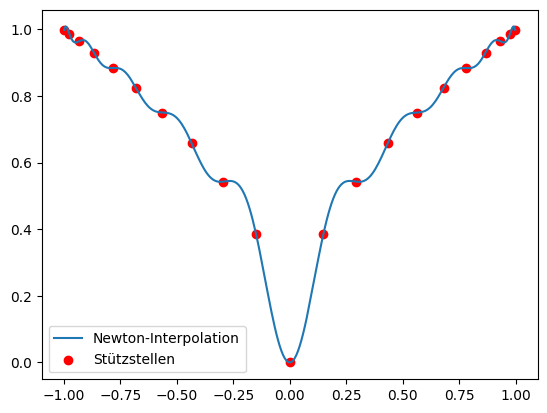

[np.float64(0.43966940724711445),
 np.float64(0.3334651177074844),
 np.float64(0.2797860842416882),
 np.float64(0.2459014420394745),
 np.float64(0.2222676618403457),
 np.float64(0.20436954813619618),
 np.float64(0.19020507456659239),
 np.float64(0.1786327968721346),
 np.float64(0.16894698075454032),
 np.float64(0.16068472662938058)]

In [50]:
maxi = []
for n in range(2, 21, 2): # Ein n welches bei n = 0 beginnt ist nicht möglich.
    x_s = [np.cos( (2*i+1)*np.pi/(2*n+2)) for i in range(n+1)]
    y_1s = [f_2(x_s[i]) for i in range(0, len(x_s))]
    y_ij = []

    for i in range(0, len(x_s)-1):
        steps = np.linspace(x_s[i], x_s[i+1], 21)
        for i, step in enumerate(steps):
            if i == 21:
                break
            y_ij.append(step)

    a_1 = []
    for i in range(1, len(x_s)+1):
        a_1.append(newton_interpolation(x_s[0:i], x_s, y_1s))

    var_y = [horner_newton(xi, a_1, x_s) for xi in y_ij]
    y_real = [f_2(xi) for xi in y_ij]
    maxi.append(max([abs(y_r- v_y) for y_r, v_y in zip(y_real, var_y)]))

    if n == 20:
        # Plot
        plt.plot(y_ij, var_y, label="Newton-Interpolation")
        plt.scatter(x_s, y_1s, color="red", label="Stützstellen")
        plt.legend()
        plt.show()
maxi

#### Interpretieren Sie die Ergebnisse:

Der maximale Fehler bei äquidistante Stützstellen nimmt mit zunehmender Zahl der Stützstellen zwar zu, allerdings liegt diese Abweichung stets an der Rändern des betrachteten Bereichs. Im Zentrum des Bereichs hingegen ist nimmt der Fehler deutlich ab. 

Der maximale Fehler bei Tschebyscheff-Knoten ist ist mir zunehmender Zahl der Stützstellen stets annehmend, liegt dafür auch gerne Mitten im betracheten Bereich.